
Tuning hyperparameters for linear kernel...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.1, 'gamma': 0.01}
Best cross-validation accuracy: 0.9758241758241759

Tuning hyperparameters for poly kernel...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 1, 'gamma': 0.1}
Best cross-validation accuracy: 0.9560439560439562

Tuning hyperparameters for rbf kernel...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 10, 'gamma': 0.01}
Best cross-validation accuracy: 0.9736263736263737

Tuning hyperparameters for sigmoid kernel...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 10, 'gamma': 0.01}
Best cross-validation accuracy: 0.9670329670329672

The best-performing kernel is linear with parameters {'C': 0.1, 'gamma': 0.01}.

Final Model Accuracy: 0.9824561403508771
Confusion Matrix:
[[71  0]
 [ 2 41]]
Classification Report:
              precision   

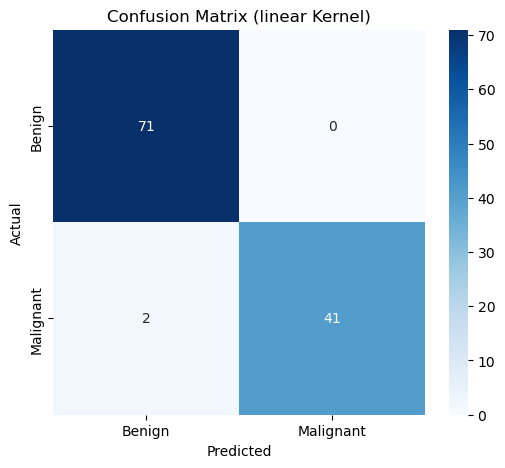

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv("/Users/rahulyadav/Desktop/breast-cancer.csv")

# Drop ID column and convert labels
data.drop(columns=["id"], inplace=True)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

# Separate features and target variable
X = data.iloc[:, 1:]  # Features
y = data.iloc[:, 0]   # Target variable (Diagnosis)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the SVM model and parameters
parameters = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize a dictionary to store results
best_models = {}

# Perform GridSearchCV for each kernel
for kernel in kernels:
    print(f"\nTuning hyperparameters for {kernel} kernel...")
    model = SVC(kernel=kernel)
    grid = GridSearchCV(model, parameters, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_models[kernel] = {'params': grid.best_params_, 'score': grid.best_score_}
    print(f"Best parameters: {grid.best_params_}")
    print(f"Best cross-validation accuracy: {grid.best_score_}")

# Determine the best-performing kernel
best_kernel = max(best_models, key=lambda k: best_models[k]['score'])
best_params = best_models[best_kernel]['params']
print(f"\nThe best-performing kernel is {best_kernel} with parameters {best_params}.")

# Train the final model using the best kernel
best_model = SVC(kernel=best_kernel, **best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nFinal Model Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix ({best_kernel} Kernel)")
plt.show()


In [68]:
print(f"Dataset shape: {data.shape}")
print(f"Number of features: {X.shape[1]}")

Dataset shape: (569, 31)
Number of features: 30


In [69]:
# Create a summary of features
feature_summary = X.describe().T[['mean', 'std', 'min', 'max']]
print("\nFeature Summary (first 5 features):")
print(feature_summary.head())



Feature Summary (first 5 features):
                       mean         std        min        max
radius_mean       14.127292    3.524049    6.98100    28.1100
texture_mean      19.289649    4.301036    9.71000    39.2800
perimeter_mean    91.969033   24.298981   43.79000   188.5000
area_mean        654.889104  351.914129  143.50000  2501.0000
smoothness_mean    0.096360    0.014064    0.05263     0.1634


In [70]:
# Standardize the features
print("\nStandardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Standardizing features...


In [72]:
best_kernel = max(best_models, key=lambda k: best_models[k]['score'])
best_params = best_models[best_kernel]['params']
print(f"\nThe best-performing kernel is {best_kernel} with parameters {best_params}.")

# Train the final model using the best kernel


The best-performing kernel is linear with parameters {'C': 0.1, 'gamma': 0.01}.


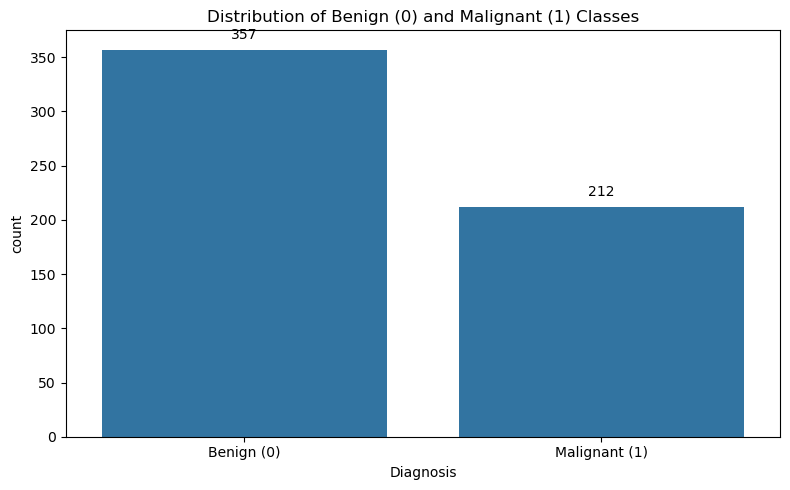

In [74]:
# 4. Distribution of Classes
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Distribution of Benign (0) and Malignant (1) Classes')
plt.xlabel('Diagnosis')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
for i in range(2):
    plt.text(i, np.sum(y == i) + 10, str(np.sum(y == i)), ha='center')
plt.tight_layout()
plt.show()


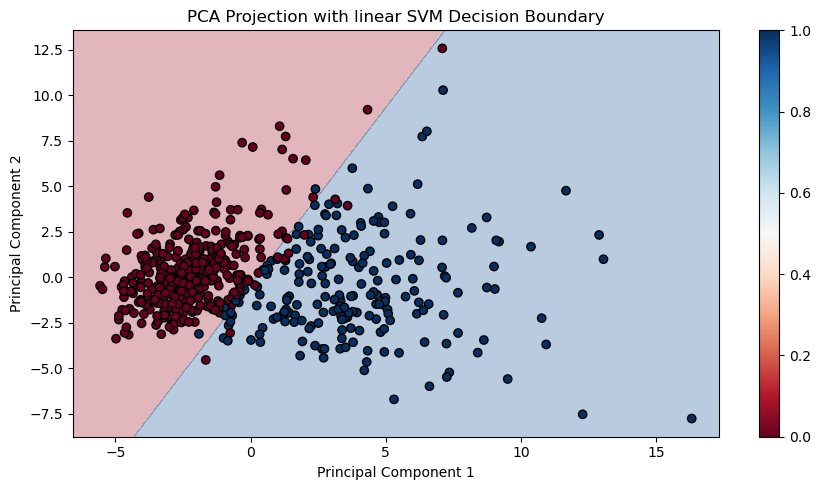

In [97]:
# 5. PCA Visualization with Decision Boundaries
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train SVM on reduced dimensions
pca_model = SVC(kernel=best_kernel, **best_params)
pca_model.fit(X_pca, y)

# Create a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Get predictions for all grid points
Z = pca_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(9, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA Projection with {best_kernel} SVM Decision Boundary')
plt.colorbar(scatter)
plt.tight_layout()
plt.show()